In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("../Dataset/podcast_listen_time_train.csv")
test=pd.read_csv("../Dataset/podcast_listen_time_test.csv")

In [3]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [4]:
test.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [5]:
train.duplicated().sum()

0

In [6]:
test["Number_of_Ads"].value_counts()

Number_of_Ads
0.00       72863
1.00       71015
3.00       53556
2.00       52564
89.12          1
2063.00        1
Name: count, dtype: int64

In [7]:
train["Number_of_Ads"].value_counts()

Number_of_Ads
0.00      217592
1.00      214069
3.00      160173
2.00      158156
103.25         2
53.37          1
103.91         1
103.00         1
53.42          1
103.75         1
12.00          1
103.88         1
Name: count, dtype: int64

In [8]:
def feature_eng(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    df['Episode_Num'] = df['Episode_Title'].str[8:].astype(int)    
    df['is_weekend']   = df['Publication_Day'].isin(['Saturday', 'Sunday']).astype(int)

    return df.drop(columns=['Episode_Title'])

train = feature_eng(train)
test = feature_eng(test)
train.head()

,id,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Episode_Num,is_weekend
0,0,Mystery Matters,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998,98,0
1,1,Joke Junction,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,26,1
2,2,Study Sessions,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,16,0
3,3,Digital Digest,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,45,0
4,4,Mind & Body,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,86,0


In [9]:
train.shape

(750000, 13)

In [10]:
test.shape

(250000, 12)

In [11]:
train["Genre"].value_counts()

Genre
Sports        87606
Technology    86256
True Crime    85059
Lifestyle     82461
Comedy        81453
Business      80521
Health        71416
News          63385
Music         62743
Education     49100
Name: count, dtype: int64

In [12]:
train["Publication_Day"].value_counts()

Publication_Day
Sunday       115946
Monday       111963
Friday       108237
Wednesday    107886
Thursday     104360
Saturday     103505
Tuesday       98103
Name: count, dtype: int64

In [13]:
train["Publication_Time"].value_counts()

Publication_Time
Night        196849
Evening      195778
Afternoon    179460
Morning      177913
Name: count, dtype: int64

In [ ]:
train[""]

In [14]:
genre_mapper={
    "Sports":1,
    "Technology":2,
    "True Crime":3,
    "Lifestyle":4,
    "Comedy":5,
    "Business":6,
    "Health":7,
    "News":8,
    "Music":9,
    "Education":10
}

publication_time_mapper={
    "Night":1,
    "Evening":2,
    "Afternoon":3,
    "Morning":4

}

publication_day_mapper={
    "Sunday":1,
    "Monday":2,
    "Friday":3,
    "Wednesday":4,
    "Thursday":5,
    "Saturday":6,
    "Tuesday":7,
}

train["Genre"]=train["Genre"].map(genre_mapper)
train["Publication_Day"]=train["Publication_Day"].map(publication_day_mapper)
train["Publication_Time"]=train["Publication_Time"].map(publication_time_mapper)

test["Genre"]=test["Genre"].map(genre_mapper)
test["Publication_Day"]=test["Publication_Day"].map(publication_day_mapper)
test["Publication_Time"]=test["Publication_Time"].map(publication_time_mapper)

In [15]:
train.head()

,id,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Episode_Num,is_weekend
0,0,Mystery Matters,NaN,3,74.81,5,1,NaN,0.0,Positive,31.41998,98,0
1,1,Joke Junction,119.80,5,66.95,6,3,75.95,2.0,Negative,88.01241,26,1
2,2,Study Sessions,73.90,10,69.97,7,2,8.97,0.0,Negative,44.92531,16,0
3,3,Digital Digest,67.17,2,57.22,2,4,78.70,2.0,Positive,46.27824,45,0
4,4,Mind & Body,110.51,7,80.07,2,3,58.68,3.0,Neutral,75.61031,86,0


In [16]:
# def convert_pos_neg(data):
#     if data=="Positive":
#         return 1
#     elif data=="Neutral":
#         return 0
#     else:
#         return -1

# train["Episode_Sentiment"]=train["Episode_Sentiment"].apply(convert_pos_neg)
# test["Episode_Sentiment"]=test["Episode_Sentiment"].apply(convert_pos_neg)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# train_encoder=LabelEncoder()
# train["Number_of_Ads"]=train_encoder.fit_transform(train["Number_of_Ads"])

In [ ]:
# train["Number_of_Ads"].value_counts()

Number_of_Ads
0     217592
1     214069
3     160173
2     158156
8          2
5          1
12         1
11         1
7          1
6          1
9          1
4          1
10         1
Name: count, dtype: int64

In [ ]:
# test_encoder=LabelEncoder()
# test["Number_of_Ads"]=test_encoder.fit_transform(test["Number_of_Ads"])

In [ ]:
# test["Number_of_Ads"].value_counts()

Number_of_Ads
0    72863
1    71015
3    53556
2    52564
4        1
5        1
Name: count, dtype: int64

In [21]:
train.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       0
Episode_Sentiment                   0
Listening_Time_minutes              0
Episode_Num                         0
is_weekend                          0
dtype: int64

In [22]:
train["Episode_Sentiment"].value_counts()


Episode_Sentiment
Neutral     251291
Negative    250116
Positive    248593
Name: count, dtype: int64

In [23]:
train["Podcast_Name"].value_counts()

Podcast_Name
Tech Talks             22847
Sports Weekly          20053
Funny Folks            19635
Tech Trends            19549
Fitness First          19488
Business Insights      19480
Style Guide            19364
Game Day               19272
Melody Mix             18889
Criminal Minds         17735
Finance Focus          17628
Detective Diaries      17452
Crime Chronicles       17374
Athlete's Arena        17327
Fashion Forward        17280
Tune Time              17254
Business Briefs        17012
Lifestyle Lounge       16661
True Crime Stories     16373
Sports Central         16191
Digital Digest         16171
Humor Hub              16144
Mystery Matters        16002
Comedy Corner          15927
Joke Junction          15074
Wellness Wave          15009
Sport Spot             14778
Gadget Geek            14770
Home & Living          14686
Laugh Line             14673
Life Lessons           14464
World Watch            14043
Sound Waves            13928
Global News            13649
M

In [24]:
train.head()

,id,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Episode_Num,is_weekend
0,0,Mystery Matters,NaN,3,74.81,5,1,NaN,0,Positive,31.41998,98,0
1,1,Joke Junction,119.80,5,66.95,6,3,75.95,2,Negative,88.01241,26,1
2,2,Study Sessions,73.90,10,69.97,7,2,8.97,0,Negative,44.92531,16,0
3,3,Digital Digest,67.17,2,57.22,2,4,78.70,2,Positive,46.27824,45,0
4,4,Mind & Body,110.51,7,80.07,2,3,58.68,3,Neutral,75.61031,86,0


In [25]:
def is_weekend(data):
    if(data==6):
        return 1
    else:
        return 0

In [26]:
train["Weekend"]=train["Publication_Day"].apply(is_weekend)
test["Weekend"]=test["Publication_Day"].apply(is_weekend)

In [27]:
train["Weekend"].value_counts()

Weekend
0    646495
1    103505
Name: count, dtype: int64

In [28]:
train.head()

,id,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Episode_Num,is_weekend,Weekend
0,0,Mystery Matters,NaN,3,74.81,5,1,NaN,0,Positive,31.41998,98,0,0
1,1,Joke Junction,119.80,5,66.95,6,3,75.95,2,Negative,88.01241,26,1,1
2,2,Study Sessions,73.90,10,69.97,7,2,8.97,0,Negative,44.92531,16,0,0
3,3,Digital Digest,67.17,2,57.22,2,4,78.70,2,Positive,46.27824,45,0,0
4,4,Mind & Body,110.51,7,80.07,2,3,58.68,3,Neutral,75.61031,86,0,0


In [29]:
train["Episode_Length_minutes"]=train["Episode_Length_minutes"].fillna(train["Episode_Length_minutes"].mean())
train["Guest_Popularity_percentage"]=train["Guest_Popularity_percentage"].fillna(train["Guest_Popularity_percentage"].mean())

In [30]:
test["Episode_Length_minutes"]=test["Episode_Length_minutes"].fillna(test["Episode_Length_minutes"].mean())
test["Guest_Popularity_percentage"]=test["Guest_Popularity_percentage"].fillna(test["Guest_Popularity_percentage"].mean())

In [31]:
train.isna().sum()

id                             0
Podcast_Name                   0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
Episode_Num                    0
is_weekend                     0
Weekend                        0
dtype: int64

In [32]:
test.isna().sum()

id                             0
Podcast_Name                   0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Episode_Num                    0
is_weekend                     0
Weekend                        0
dtype: int64

In [33]:
train.drop(columns=["id"],inplace=True)

In [34]:
test_df=test.drop(columns=["id"])

In [35]:
test_df.shape

(250000, 12)

In [36]:
train.shape

(750000, 13)

In [37]:
train.head()

,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Episode_Num,is_weekend,Weekend
0,Mystery Matters,64.504738,3,74.81,5,1,52.236449,0,Positive,31.41998,98,0,0
1,Joke Junction,119.800000,5,66.95,6,3,75.950000,2,Negative,88.01241,26,1,1
2,Study Sessions,73.900000,10,69.97,7,2,8.970000,0,Negative,44.92531,16,0,0
3,Digital Digest,67.170000,2,57.22,2,4,78.700000,2,Positive,46.27824,45,0,0
4,Mind & Body,110.510000,7,80.07,2,3,58.680000,3,Neutral,75.61031,86,0,0


In [38]:
train["Episode_Sentiment"].value_counts()

Episode_Sentiment
Neutral     251291
Negative    250116
Positive    248593
Name: count, dtype: int64

In [39]:
train.shape

(750000, 13)

In [40]:
test_df.shape

(250000, 12)

<Axes: xlabel='Publication_Time'>

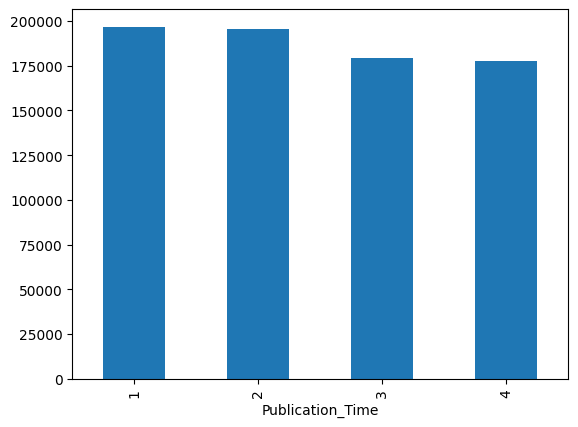

In [41]:
train.groupby(by="Publication_Time")["Publication_Time"].value_counts().plot(kind="bar")

<Axes: xlabel='Publication_Day'>

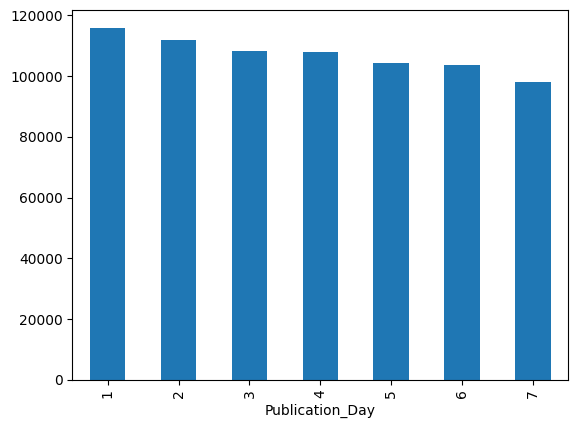

In [42]:
train.groupby(by="Publication_Day")["Publication_Day"].value_counts().plot(kind="bar")

<Axes: xlabel='Genre'>

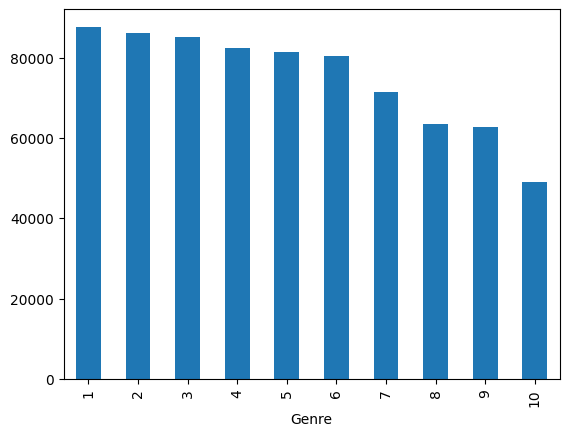

In [43]:
train.groupby(by="Genre")["Genre"].value_counts().plot(kind="bar")

In [44]:
columns=train.select_dtypes(exclude="object").columns.tolist()
columns.remove("Listening_Time_minutes")

In [45]:
train.head()

,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Episode_Num,is_weekend,Weekend
0,Mystery Matters,64.504738,3,74.81,5,1,52.236449,0,Positive,31.41998,98,0,0
1,Joke Junction,119.800000,5,66.95,6,3,75.950000,2,Negative,88.01241,26,1,1
2,Study Sessions,73.900000,10,69.97,7,2,8.970000,0,Negative,44.92531,16,0,0
3,Digital Digest,67.170000,2,57.22,2,4,78.700000,2,Positive,46.27824,45,0,0
4,Mind & Body,110.510000,7,80.07,2,3,58.680000,3,Neutral,75.61031,86,0,0


In [46]:
columns

['Episode_Length_minutes',
 'Genre',
 'Host_Popularity_percentage',
 'Publication_Day',
 'Publication_Time',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Episode_Num',
 'is_weekend',
 'Weekend']

In [47]:
test_df["Episode_Sentiment"].value_counts()

Episode_Sentiment
Neutral     83671
Negative    83510
Positive    82819
Name: count, dtype: int64

In [48]:
X=train.drop(columns=["Listening_Time_minutes"])
Y=train["Listening_Time_minutes"]

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_cols=X.select_dtypes(include=(['int64','float64'])).columns.tolist()
cat_cols=X.select_dtypes(include=(['object'])).columns.tolist()

num_pipeline=Pipeline([
    ('Impute',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
    ])

cat_pipeline=Pipeline([('Impute',SimpleImputer(strategy='most_frequent')),
                       ('scaler',OneHotEncoder(handle_unknown='ignore',drop='first',
                                              sparse_output=False))])

col_transformer=ColumnTransformer([
    ('num',num_pipeline,num_cols),
    ('cat',cat_pipeline,cat_cols)
    ])


In [50]:
X.shape

(750000, 12)

In [51]:
test_df.shape

(250000, 12)

In [52]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=.2)

In [53]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# import numpy as np


# # Define XGBoost Regressor
# xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# # Define hyperparameter space
# param_dist = {
#     'n_estimators': [100, 200, 300, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 4, 5, 6, 7, 10],
#     'min_child_weight': [1, 3, 5, 7],
#     'gamma': [0, 0.1, 0.2, 0.3],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'reg_alpha': [0, 0.01, 0.1, 1],
#     'reg_lambda': [1, 1.5, 2, 3]
# }

# # Randomized search with 5-fold cross-validation
# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=50,  # Number of random combinations to try
#     scoring='neg_mean_squared_error',
#     cv=5,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# # Run RandomizedSearchCV
# random_search.fit(x_train, y_train)




Best Parameters:
 {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best CV Score (RMSE): 26.96881744270246

In [54]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"


In [55]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error
import numpy as np


In [56]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # or however many physical cores you have


In [57]:
# lgbm =LGBMRegressor(n_estimators=6000,
#     max_depth=15,
#     learning_rate=0.1,
#     subsample=0.9,
#     colsample_bytree=0.9,
#     random_state=6,
#     n_jobs=-1,
#     verbose=-1)

# model=Pipeline([('pre',col_transformer),
#                ('lg',lgbm)])
from sklearn.ensemble import RandomForestRegressor


random=RandomForestRegressor(random_state=42)

model=Pipeline([('pre',col_transformer),
               ('rand',random)])
# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=lgbm,
#     param_distributions=param_grid,
#     n_iter=30,  # you can increase this for better results
#     cv=cv,
#     scoring='neg_root_mean_squared_error',  # RMSE (regression problem)
#     verbose=2,
#     random_state=42,
#     n_jobs=-1  # use all cores
# )
# result:
# LGBMRegressor(colsample_bytree=0.8, n_estimators=500, num_leaves=100,
#               subsample=0.8)


In [58]:
model.fit(x_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Episode_Length_minutes',
                                                   'Genre',
                                                   'Host_Popularity_percentage',
                                                   'Publication_Day',
                                                   'Publication_Time',
                                                   'Guest_Popularity_percentage',
                                                   'Number_of_Ads',
                                                   'Weekend']),
                                                 ('cat',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Podcast_Name',
                                                   'Episode_Sentiment'])])),
                ('rand', RandomForestRegressor(random_state=42))])

In [59]:
from sklearn.metrics import r2_score


y_pred=model.predict(x_test)

print(f'MSE: {mean_squared_error(y_test,y_pred) :.2f}')
print(f'R2 score {r2_score(y_test,y_pred) * 100 :.2f}')
rmsc=np.sqrt(mean_squared_error(y_test,y_pred))

print(f'RMSC = {rmsc :.4f}')

MSE: 161.92
R2 score 77.99
RMSC = 12.7247


In [60]:
# best_lgbm = random_search.best_estimator_
# best_lgbm.fit(X, Y)
predicted = model.predict(test_df)

submission = pd.DataFrame({
    "id": test["id"],
    "Listening_Time_minutes": predicted
})
submission.to_csv("tuned_podcast_listening_time.csv", index=False)


In [61]:
stop

NameError: name 'stop' is not defined

In [ ]:
from ydf import GradientBoostedTreesLearner
import ydf
ydf_model=GradientBoostedTreesLearner(label="Listening_Time_minutes",task=ydf.Task.REGRESSION).train(train)

ydf_model.describe()

Train model on 750000 examples


: 

: 

In [ ]:
ydf_predict = ydf_model.predict(test_df)

submission = pd.DataFrame({
    "id": test["id"],
    "Listening_Time_minutes": ydf_predict
})
submission.to_csv("ydf_tuned_podcast_listening_time.csv", index=False)



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout

In [ ]:
X.shape

(750000, 12)

In [ ]:
X.shape[1]

12

In [ ]:
model=tf.keras.Sequential(
    [
        Dense(200,kernel_initializer='he_normal',input_shape=[X.shape[1],],activation="relu"),
        BatchNormalization(),
        Dropout(.25),

        Dense(200,kernel_initializer='he_normal',activation="relu"),
        BatchNormalization(),
        Dropout(.25),
        
        Dense(50,kernel_initializer='he_normal',activation="relu"),
        BatchNormalization(),
        Dropout(.2),
        
        Dense(1,activation="linear"),
    ]
)
model.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,701 (213.68 KB)

 Trainable params: 53,801 (210.16 KB)

 Non-trainable params: 900 (3.52 KB)

In [ ]:
import tensorflow.keras.backend as K
import tensorflow as tf

def rmse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.01),loss=tf.keras.losses.MSE,metrics=[rmse,'mae'])

In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_rmse',
    factor=0.3,
    patience=10,
    min_lr=1e-6,
    mode='min'
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_rmse', 
    patience=25, 
    restore_best_weights=True,
    mode='min'
)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='models/ann_best_model.keras',            # Save to file
    monitor='val_rmse',                  # What to monitor
    mode='min',                          # We want to maximize accuracy
    save_best_only=True,                 # Only save if it's the best
    verbose=1
)

In [ ]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2,batch_size=128,callbacks=[early_stopping,lr_scheduler,checkpoint])

ValueError: Invalid dtype: object

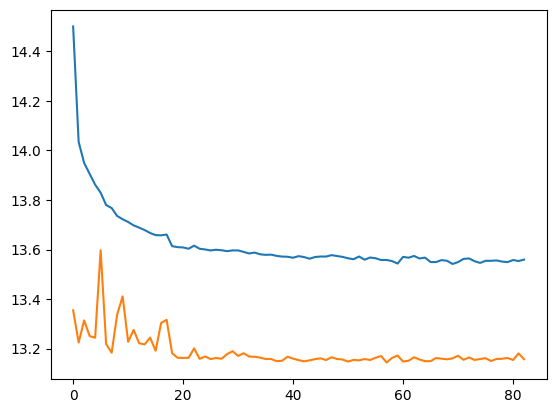

In [ ]:
plt.plot(history.history["rmse"])
plt.plot(history.history["val_rmse"])

In [ ]:
predicted=model.predict(test_df)

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 5s 625us/step


In [ ]:
predicted = predicted.flatten()


In [ ]:
submission = pd.DataFrame({
    "id": test["id"],
    "Listening_Time_minutes": predicted
})
submission.head()

,id,Listening_Time_minutes
0,750000,54.632217
1,750001,17.594786
2,750002,47.924824
3,750003,81.973854
4,750004,49.140182


In [ ]:
submission.to_csv("pocast_listening_time.csv",index=False)

In [ ]:
submission.shape

(250000, 2)